<a href="https://colab.research.google.com/github/febbyftrp/Python-Task/blob/main/FinalTask_FebbyFitri(1101183474).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL TASK**

---
Febby Fitri Permadani (1101183474)


# Power Receiver Function 1st Graph

In [610]:
import numpy as np
import matplotlib.pyplot as plt

In [611]:
#Parameter

frek  = 1800 #MHz
loc1  = 'urban'
loc2  = 'suburban'
loc3  = 'open'
tower = 80 #m
user  = 1.5 #m
dmin  = 300 #m
dmax  = 1000 #m
N     = 200 #titik
d     = np.random.randint(dmin,dmax,N)
Gtx   = 10 #dB
Grx   = 2 #dB
Bw    = 5000000 #hz

In [612]:
#FUNGSI PATHLOSS(COST231)

def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [613]:
LpUrban   = cos(frek,loc1,tower,user,d)
LpSuburban= cos(frek,loc2,tower,user,d)
LpOpen    = cos(frek,loc3,tower,user,d)

In [614]:
#Numeric to Logaritmic (watt to dB)
NtL = lambda x:10*np.log10(x)

In [615]:
#Calculate transmitter power in dBm
#Ptx = 30 Watt = 30000 mW

Ptx=NtL(30000)
print("Ptx is",Ptx,"dBm")

Ptx is 44.771212547196626 dBm


In [616]:
#Logaritmic to Numeric (dBm to mW)
LtN = lambda x: 10**(x/10)

In [617]:
#FUNGSI DAYA TERIMA

def Prx(Ptx,Lp,Gtx,Grx):
  #Ptx  = daya transmitter (dBm)
  #Lp   = path loss (dB)
  #Gtx  = gain antenna transmitter (dB)
  #Grx  = gain antenna receiver (dB)
  
  #calculate prx in dBm
  pdbm = Ptx-Lp+Gtx+Grx

  #convert prx from dBm to mW
  prx=LtN(pdbm)

  return prx

In [618]:
#At Different Location (Urban, Suburban, Open)

prxUrban    = Prx(Ptx,LpUrban,Gtx,Grx)
prxSuburban = Prx(Ptx,LpSuburban,Gtx,Grx)
prxOpen     = Prx(Ptx,LpOpen,Gtx,Grx)

In [619]:
print(prxUrban, "mW")

[4.03061848e-14 3.20922451e-14 2.80135987e-14 3.79147187e-14
 1.90732391e-13 2.44869952e-13 1.19347379e-13 4.21698815e-13
 1.28651240e-12 8.72881348e-13 4.37027991e-14 6.19927518e-14
 2.83805208e-14 6.12144222e-13 5.39995861e-14 1.57172425e-13
 8.25174339e-14 2.89966171e-13 4.27404440e-14 2.59368166e-13
 1.28651240e-12 7.06835677e-14 4.55420190e-14 5.68050881e-13
 2.95197083e-14 5.49786960e-13 4.95485826e-13 9.80135088e-14
 9.98014235e-13 4.21142333e-14 6.33179800e-13 5.87116788e-13
 8.55801638e-14 2.83805208e-14 2.14938063e-13 1.87414585e-13
 1.71911342e-13 1.71911342e-13 5.90050764e-14 5.46485619e-14
 3.43652101e-14 1.58921973e-13 1.72891498e-13 3.01117722e-14
 7.31819991e-14 2.62741530e-13 6.78172707e-13 6.97754553e-14
 1.06414889e-13 4.00147775e-14 2.75010252e-13 5.87646844e-14
 6.32960163e-14 3.57055452e-14 8.59733998e-14 7.51321134e-14
 3.94401818e-14 1.17141976e-12 1.39491656e-13 9.80135088e-14
 7.47122646e-13 3.12381932e-14 1.17141976e-12 3.25307392e-14
 2.69662377e-13 5.597744

In [620]:
print(prxSuburban,"mW")

[9.16486141e-14 7.29716743e-14 6.36976066e-14 8.62108742e-14
 4.33689255e-13 5.56787795e-13 2.71373287e-13 9.58863067e-13
 2.92528501e-12 1.98476651e-12 9.93718703e-14 1.40959751e-13
 6.45319177e-14 1.39189978e-12 1.22784810e-13 3.57380264e-13
 1.87628983e-13 6.59328037e-13 9.71836575e-14 5.89753981e-13
 2.92528501e-12 1.60721017e-13 1.03553907e-13 1.29163989e-12
 6.71222139e-14 1.25011120e-12 1.12664072e-12 2.22864116e-13
 2.26929495e-12 9.57597733e-14 1.43973069e-12 1.33499214e-12
 1.94593049e-13 6.45319177e-14 4.88728360e-13 4.26145195e-13
 3.90893764e-13 3.90893764e-13 1.34166345e-13 1.24260458e-13
 7.81399653e-14 3.61358404e-13 3.93122451e-13 6.84684547e-14
 1.66401976e-13 5.97424372e-13 1.54203602e-12 1.58656142e-13
 2.41967261e-13 9.09860093e-14 6.25321116e-13 1.33619739e-13
 1.43923127e-13 8.11876330e-14 1.95487194e-13 1.70836166e-13
 8.96794877e-14 2.66358619e-12 3.17177550e-13 2.22864116e-13
 1.69881509e-12 7.10297223e-14 2.66358619e-12 7.39687267e-14
 6.13161064e-13 1.272820

In [621]:
print(prxOpen, "mW")

[8.36114848e-14 6.65724200e-14 5.81116421e-14 7.86506078e-14
 3.95656857e-13 5.07960264e-13 2.47575195e-13 8.74775527e-13
 2.66875201e-12 1.81071233e-12 9.06574497e-14 1.28598280e-13
 5.88727883e-14 1.26983706e-12 1.12017190e-13 3.26039786e-13
 1.71174851e-13 6.01508236e-13 8.86611324e-14 5.38035479e-13
 2.66875201e-12 1.46626581e-13 9.44727429e-14 1.17836947e-12
 6.12359283e-14 1.14048264e-12 1.02783992e-12 2.03320038e-13
 2.07028903e-12 8.73621157e-14 1.31347344e-12 1.21791995e-12
 1.77528203e-13 5.88727883e-14 4.45869304e-13 3.88774373e-13
 3.56614318e-13 3.56614318e-13 1.22400621e-13 1.13363431e-13
 7.12874775e-14 3.29669063e-13 3.58647560e-13 6.24641105e-14
 1.51809347e-13 5.45033215e-13 1.40680710e-12 1.44742785e-13
 2.20747931e-13 8.30069872e-14 5.70483553e-13 1.21901950e-13
 1.31301782e-13 7.40678799e-14 1.78343935e-13 1.55854681e-13
 8.18150410e-14 2.43000288e-12 2.89362651e-13 2.03320038e-13
 1.54983743e-12 6.48007676e-14 2.43000288e-12 6.74820359e-14
 5.59389877e-13 1.161200

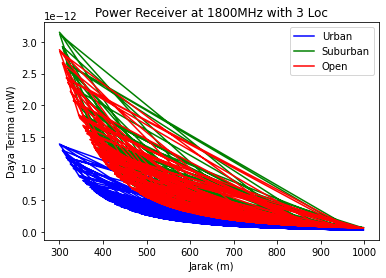

In [622]:
plt.figure()
plt.plot(d,prxUrban,'b', label='Urban')
plt.plot(d,prxSuburban,'g', label='Suburban')
plt.plot(d,prxOpen,'r', label='Open')
plt.legend()
plt.title('Power Receiver at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

In [623]:
d_sort=d[np.argsort(d)]
prxUrban_sort    =prxUrban[np.argsort(d)]
prxSuburban_sort =prxSuburban[np.argsort(d)]
prxOpen_sort     =prxOpen[np.argsort(d)]

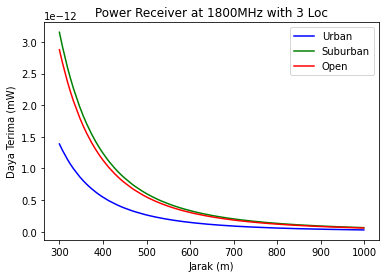

In [624]:
plt.figure()
plt.plot(d_sort,prxUrban_sort,'b', label='Urban')
plt.plot(d_sort,prxSuburban_sort,'g', label='Suburban')
plt.plot(d_sort,prxOpen_sort,'r', label='Open')
plt.legend()
plt.title('Power Receiver at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

# Power Receiver Function 2nd Graph

In [625]:
#Parameter

frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
loc   = 'urban'

In [626]:
LpUrbanF1 = cos(frek1,loc,tower,user,d)
LpUrbanF2 = cos(frek2,loc,tower,user,d)
LpUrbanF3 = cos(frek3,loc,tower,user,d)

In [627]:
#At Different Frequency (700 MHz, 900 MHz, 1800 MHz)

prxUrbanF1 = Prx(Ptx,LpUrbanF1,Gtx,Grx)
prxUrbanF2 = Prx(Ptx,LpUrbanF2,Gtx,Grx)
prxUrbanF3 = Prx(Ptx,LpUrbanF3,Gtx,Grx)

In [628]:
print(prxUrbanF1, "mW")

[7.40077909e-13 5.89258492e-13 5.14368842e-13 6.96167249e-13
 3.50211338e-12 4.49615470e-12 2.19138475e-12 7.74297986e-12
 2.36221664e-11 1.60273220e-11 8.02444496e-13 1.13827360e-12
 5.21106044e-13 1.12398238e-11 9.91507904e-13 2.88590549e-12
 1.51513546e-12 5.32418433e-12 7.84774312e-13 4.76236217e-12
 2.36221664e-11 1.29784913e-12 8.36215147e-13 1.04302084e-11
 5.42023119e-13 1.00948573e-11 9.09781255e-12 1.79966507e-12
 1.83249368e-11 7.73276208e-13 1.16260665e-11 1.07802851e-11
 1.57137147e-12 5.21106044e-13 3.94656336e-12 3.44119382e-12
 3.15653261e-12 3.15653261e-12 1.08341570e-12 1.00342401e-12
 6.30993307e-13 2.91802964e-12 3.17452963e-12 5.52894240e-13
 1.34372383e-12 4.82430186e-12 1.24521991e-11 1.28117492e-12
 1.95392616e-12 7.34727265e-13 5.04957275e-12 1.07900177e-12
 1.16220336e-12 6.55603734e-13 1.57859183e-12 1.37953065e-12
 7.24176883e-13 2.15089046e-11 2.56126184e-12 1.79966507e-12
 1.37182164e-11 5.73576904e-13 2.15089046e-11 5.97309857e-13
 4.95137829e-12 1.027824

In [629]:
print(prxUrbanF2, "mW")

[3.84359668e-13 3.06031561e-13 2.67137601e-13 3.61554654e-13
 1.81882355e-12 2.33507919e-12 1.13809628e-12 4.02131874e-12
 1.22681787e-11 8.32379414e-12 4.16749772e-13 5.91162712e-13
 2.70636569e-13 5.83740563e-12 5.14939905e-13 1.49879582e-12
 7.86886023e-13 2.76511661e-12 4.07572757e-13 2.47333412e-12
 1.22681787e-11 6.74038308e-13 4.34288569e-13 5.41693164e-12
 2.81499858e-13 5.24276694e-12 4.72495147e-12 9.34656552e-13
 9.51706102e-12 4.01601214e-13 6.03800084e-12 5.59874408e-12
 8.16092208e-13 2.70636569e-13 2.04964878e-12 1.78718497e-12
 1.63934609e-12 1.63934609e-12 5.62672247e-13 5.21128537e-13
 3.27706549e-13 1.51547950e-12 1.64869285e-12 2.87145777e-13
 6.97863343e-13 2.50550251e-12 6.46705307e-12 6.65378550e-13
 1.01477209e-12 3.81580809e-13 2.62249701e-12 5.60379869e-13
 6.03590638e-13 3.40487982e-13 8.19842105e-13 7.16459627e-13
 3.76101465e-13 1.11706556e-11 1.33019205e-12 9.34656552e-13
 7.12455950e-12 2.97887324e-13 1.11706556e-11 3.10213040e-13
 2.57149969e-12 5.338007

In [630]:
print(prxUrbanF3, "mW")

[4.03061848e-14 3.20922451e-14 2.80135987e-14 3.79147187e-14
 1.90732391e-13 2.44869952e-13 1.19347379e-13 4.21698815e-13
 1.28651240e-12 8.72881348e-13 4.37027991e-14 6.19927518e-14
 2.83805208e-14 6.12144222e-13 5.39995861e-14 1.57172425e-13
 8.25174339e-14 2.89966171e-13 4.27404440e-14 2.59368166e-13
 1.28651240e-12 7.06835677e-14 4.55420190e-14 5.68050881e-13
 2.95197083e-14 5.49786960e-13 4.95485826e-13 9.80135088e-14
 9.98014235e-13 4.21142333e-14 6.33179800e-13 5.87116788e-13
 8.55801638e-14 2.83805208e-14 2.14938063e-13 1.87414585e-13
 1.71911342e-13 1.71911342e-13 5.90050764e-14 5.46485619e-14
 3.43652101e-14 1.58921973e-13 1.72891498e-13 3.01117722e-14
 7.31819991e-14 2.62741530e-13 6.78172707e-13 6.97754553e-14
 1.06414889e-13 4.00147775e-14 2.75010252e-13 5.87646844e-14
 6.32960163e-14 3.57055452e-14 8.59733998e-14 7.51321134e-14
 3.94401818e-14 1.17141976e-12 1.39491656e-13 9.80135088e-14
 7.47122646e-13 3.12381932e-14 1.17141976e-12 3.25307392e-14
 2.69662377e-13 5.597744

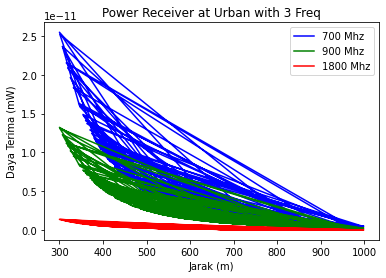

In [631]:
plt.figure()
plt.plot(d,prxUrbanF1,'b',label='700 Mhz')
plt.plot(d,prxUrbanF2,'g',label='900 Mhz')
plt.plot(d,prxUrbanF3,'r',label='1800 Mhz')
plt.legend()
plt.title('Power Receiver at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

In [632]:
d_sort=d[np.argsort(d)]
UrbanF1_sort=prxUrbanF1[np.argsort(d)]
UrbanF2_sort=prxUrbanF2[np.argsort(d)]
UrbanF3_sort=prxUrbanF3[np.argsort(d)]

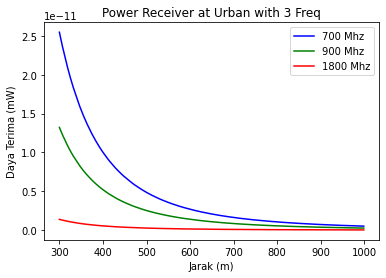

In [633]:
plt.figure()
plt.plot(d_sort,UrbanF1_sort,'b',label='700 Mhz')
plt.plot(d_sort,UrbanF2_sort,'g',label='900 Mhz')
plt.plot(d_sort,UrbanF3_sort,'r',label='1800 Mhz')
plt.legend()
plt.title('Power Receiver at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

# SNR Function 1st Graph

In [634]:
#FUNGSI SNR

def snr(prx, Bw):
  no  = -174 + 10*np.log10(Bw)
  Noise = LtN(no)
  SNR = prx/Noise
  return SNR

In [635]:
#At Different Location (Urban, Suburban, Open)

SNRUrban    = prxUrban/Noise
SNRSuburban = prxSuburban/Noise
SNROpen     = prxOpen/Noise

In [636]:
print(SNRUrban)

[0.00202489 0.00161224 0.00140734 0.00190475 0.00958196 0.01230171
 0.00599574 0.02118519 0.06463146 0.04385158 0.00219553 0.00311438
 0.00142577 0.03075274 0.00271282 0.00789599 0.00414549 0.01456724
 0.00214718 0.01303007 0.06463146 0.00355098 0.00228793 0.02853759
 0.001483   0.02762005 0.02489208 0.00492398 0.05013797 0.00211572
 0.03180951 0.02949541 0.00429935 0.00142577 0.010798   0.00941528
 0.00863644 0.00863644 0.00296428 0.00274542 0.00172643 0.00798388
 0.00868568 0.00151275 0.0036765  0.01319954 0.03406986 0.00350536
 0.00534604 0.00201025 0.01381589 0.0029522  0.00317985 0.00179377
 0.00431911 0.00377447 0.00198139 0.05884947 0.00700774 0.00492398
 0.03753374 0.00156934 0.05884947 0.00163427 0.01354723 0.00281218
 0.00209252 0.04344301 0.00947042 0.00369259 0.00657797 0.01399888
 0.0106032  0.02508906 0.00429935 0.00478546 0.01169839 0.01456724
 0.00347537 0.00198139 0.00192526 0.00195306 0.01981773 0.00204711
 0.03855776 0.00521715 0.0042602  0.00963838 0.00490053 0.0696

In [637]:
print(SNRSuburban)

[0.00460422 0.00366593 0.00320002 0.00433104 0.02178756 0.02797175
 0.01363318 0.0481711  0.14695967 0.09971016 0.00499222 0.0070815
 0.00324194 0.06992588 0.00616843 0.01795397 0.00942605 0.03312314
 0.00488229 0.0296279  0.14695967 0.00807426 0.00520231 0.06488905
 0.00337207 0.06280275 0.05659987 0.01119619 0.11400422 0.00481075
 0.0723288  0.06706697 0.00977591 0.00324194 0.0245526  0.02140857
 0.01963761 0.01963761 0.00674021 0.00624256 0.00392557 0.01815383
 0.01974958 0.0034397  0.00835966 0.03001324 0.07746839 0.00797052
 0.01215589 0.00457093 0.03141471 0.00671275 0.00723037 0.00407868
 0.00982083 0.00858242 0.00450529 0.13381252 0.01593428 0.01119619
 0.08534461 0.00356837 0.13381252 0.00371602 0.03080382 0.00639436
 0.004758   0.09878116 0.02153393 0.00839625 0.01495706 0.0318308
 0.02410967 0.05704776 0.00977591 0.01088122 0.02659991 0.03312314
 0.00790233 0.00450529 0.00437768 0.00444088 0.04506176 0.00465475
 0.08767303 0.01186281 0.00968688 0.02191584 0.01114287 0.158375

In [638]:
print(SNROpen)

[0.00420045 0.00334445 0.0029194  0.00395123 0.0198769  0.02551877
 0.01243762 0.04394674 0.13407204 0.09096607 0.00455442 0.00646049
 0.00295764 0.06379373 0.00562749 0.0163795  0.00859944 0.03021841
 0.00445413 0.02702968 0.13407204 0.00736619 0.0047461  0.05919861
 0.00307635 0.05729526 0.05163634 0.01021434 0.10400662 0.00438887
 0.06598592 0.06118553 0.00891861 0.00295764 0.02239946 0.01953114
 0.01791549 0.01791549 0.00614913 0.00569512 0.00358132 0.01656182
 0.01801764 0.00313806 0.00762656 0.02738123 0.07067479 0.00727155
 0.01108987 0.00417008 0.0286598  0.00612408 0.0065963  0.003721
 0.00895959 0.00782979 0.0041102  0.12207783 0.01453692 0.01021434
 0.07786031 0.00325544 0.12207783 0.00339014 0.02810248 0.00583361
 0.00434075 0.09011854 0.01964551 0.00765994 0.0136454  0.0290394
 0.02199537 0.05204495 0.00891861 0.00992699 0.02426723 0.03021841
 0.00720934 0.0041102  0.00399377 0.00405144 0.04111007 0.00424655
 0.07998454 0.0108225  0.00883739 0.01999393 0.0101657  0.1444869

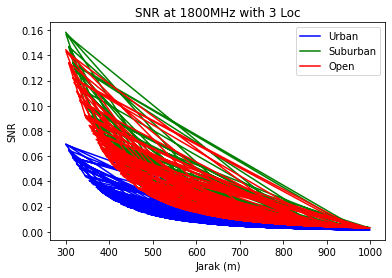

In [639]:
plt.figure()
plt.plot(d,SNRUrban,'b', label='Urban')
plt.plot(d,SNRSuburban,'g', label='Suburban')
plt.plot(d,SNROpen,'r', label='Open')
plt.legend()
plt.title('SNR at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

In [640]:
d_sort=d[np.argsort(d)]
SNRUrban_sort     = SNRUrban[np.argsort(d)]
SNRSuburban_sort  = SNRSuburban[np.argsort(d)]
SNROpen_sort      = SNROpen[np.argsort(d)]

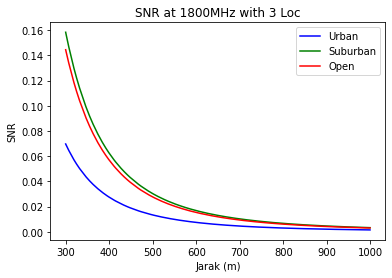

In [641]:
plt.figure()
plt.plot(d_sort,SNRUrban_sort,'b',label='Urban')
plt.plot(d_sort,SNRSuburban_sort,'g',label='Suburban')
plt.plot(d_sort,SNROpen_sort,'r',label='Open')
plt.legend()
plt.title('SNR at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

# SNR Function 2nd Graph

In [642]:
#At Different Frequency (700 MHz, 900 MHz, 1800 MHz)

SNRUrbanF1 = prxUrbanF1/Noise
SNRUrbanF2 = prxUrbanF2/Noise
SNRUrbanF3 = prxUrbanF3/Noise

In [643]:
print(SNRUrbanF1)

[0.03717983 0.02960301 0.02584072 0.03497386 0.17593822 0.2258766
 0.11009019 0.38898972 1.18672399 0.80517625 0.04031299 0.05718428
 0.02617918 0.56466322 0.0498111  0.14498134 0.07611696 0.26747493
 0.03942528 0.23925026 1.18672399 0.06520099 0.04200955 0.52398998
 0.02723001 0.5071427  0.45705344 0.09041109 0.9206032  0.03884764
 0.58406717 0.54157704 0.07894213 0.02617918 0.19826638 0.17287776
 0.15857703 0.15857703 0.05442834 0.05040974 0.03169967 0.14659518
 0.15948116 0.02777615 0.06750563 0.24236197 0.6255702  0.06436332
 0.09816081 0.03691103 0.25367907 0.0542066  0.05838646 0.03293604
 0.07930487 0.06930449 0.036381   1.08055851 0.12867198 0.09041109
 0.68917203 0.0288152  1.08055851 0.03000749 0.248746   0.05163555
 0.03842166 0.79767442 0.17389012 0.06780116 0.12078076 0.25703907
 0.19468964 0.46067021 0.07894213 0.08786765 0.21479871 0.26747493
 0.06381268 0.036381   0.03535046 0.03586089 0.36388127 0.03758786
 0.70797437 0.09579415 0.07822315 0.17697411 0.08998055 1.27891

In [644]:
print(SNRUrbanF2)

[0.01930936 0.01537433 0.01342039 0.01816368 0.09137356 0.11730907
 0.05717537 0.20202192 0.61632543 0.41816851 0.02093656 0.02969867
 0.01359617 0.293258   0.02586941 0.0752961  0.03953137 0.13891318
 0.02047553 0.12425469 0.61632543 0.03386215 0.02181767 0.27213434
 0.01414191 0.2633847  0.23737083 0.04695502 0.47811553 0.02017553
 0.30333545 0.28126819 0.04099862 0.01359617 0.1029697  0.08978411
 0.08235702 0.08235702 0.02826738 0.02618031 0.01646323 0.07613425
 0.08282658 0.01442555 0.03505907 0.12587076 0.32489006 0.03342711
 0.05097985 0.01916975 0.13174829 0.02815221 0.03032302 0.01710534
 0.04118701 0.0359933  0.01889448 0.56118836 0.06682583 0.04695502
 0.35792169 0.01496518 0.56118836 0.0155844  0.1291863  0.02681694
 0.0199543  0.41427243 0.09030988 0.03521255 0.06272752 0.13349331
 0.10111212 0.2392492  0.04099862 0.04563409 0.11155577 0.13891318
 0.03314113 0.01889448 0.01835927 0.01862436 0.18898184 0.01952127
 0.36768669 0.04975072 0.04062522 0.09191155 0.04673142 0.6642

In [645]:
print(SNRUrbanF3)

[0.00202489 0.00161224 0.00140734 0.00190475 0.00958196 0.01230171
 0.00599574 0.02118519 0.06463146 0.04385158 0.00219553 0.00311438
 0.00142577 0.03075274 0.00271282 0.00789599 0.00414549 0.01456724
 0.00214718 0.01303007 0.06463146 0.00355098 0.00228793 0.02853759
 0.001483   0.02762005 0.02489208 0.00492398 0.05013797 0.00211572
 0.03180951 0.02949541 0.00429935 0.00142577 0.010798   0.00941528
 0.00863644 0.00863644 0.00296428 0.00274542 0.00172643 0.00798388
 0.00868568 0.00151275 0.0036765  0.01319954 0.03406986 0.00350536
 0.00534604 0.00201025 0.01381589 0.0029522  0.00317985 0.00179377
 0.00431911 0.00377447 0.00198139 0.05884947 0.00700774 0.00492398
 0.03753374 0.00156934 0.05884947 0.00163427 0.01354723 0.00281218
 0.00209252 0.04344301 0.00947042 0.00369259 0.00657797 0.01399888
 0.0106032  0.02508906 0.00429935 0.00478546 0.01169839 0.01456724
 0.00347537 0.00198139 0.00192526 0.00195306 0.01981773 0.00204711
 0.03855776 0.00521715 0.0042602  0.00963838 0.00490053 0.0696

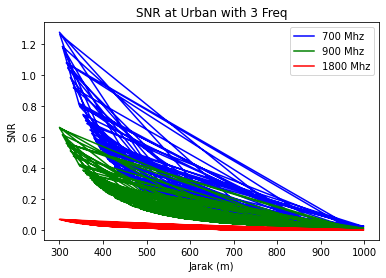

In [646]:
plt.figure()
plt.plot(d,SNRUrbanF1,'b', label='700 Mhz')
plt.plot(d,SNRUrbanF2,'g', label='900 Mhz')
plt.plot(d,SNRUrbanF3,'r', label='1800 Mhz')
plt.legend()
plt.title('SNR at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

In [647]:
d_sort=d[np.argsort(d)]
SNRUrbanF1_sort = SNRUrbanF1[np.argsort(d)]
SNRUrbanF2_sort = SNRUrbanF2[np.argsort(d)]
SNRUrbanF3_sort = SNRUrbanF3[np.argsort(d)]

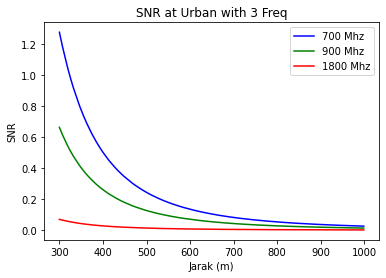

In [648]:
plt.figure()
plt.plot(d_sort,SNRUrbanF1_sort,'b',label='700 Mhz')
plt.plot(d_sort,SNRUrbanF2_sort,'g',label='900 Mhz')
plt.plot(d_sort,SNRUrbanF3_sort,'r',label='1800 Mhz')
plt.legend()
plt.title('SNR at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

# Cell Capacity Function 1st Graph

In [649]:
#FUNGSI KAPASITAS SELULER

def CellCap(SNR,Bw):
  Cap = Bw*np.log2(1+SNR)
  return Cap

In [650]:
#At Diferent Location (Urban,Suburban,Open)

CapUrban    = Bw*np.log2(1+SNRUrban)
CapSuburban = Bw*np.log2(1+SNRSuburban)
CapOpen     = Bw*np.log2(1+SNROpen)

In [651]:
print(CapUrban, "bps")

[ 14591.73391361  11620.49907469  10144.67227827  13726.79330843
  68790.19717223  88196.70183975  43120.98833562 151222.60413094
 451770.52392838 309582.95912363  15820.03626482  22430.55666763
  10277.45255832 218491.44863581  19542.33951199  56733.80563498
  29841.56684974 104322.42402407  15472.04536547  93384.97547143
 451770.52392838  25569.54815667  16485.05783406 202972.57713064
  10689.68159763 196534.70755704 177360.03488608  35431.81790928
 352894.41634973  15245.59641386 225883.27842531 209687.01574488
  30946.79854922  10277.45255832  77473.57462941  67599.17523566
  62031.23192461  62031.23192461  21351.13783589  19776.88086877
  12442.82296818  57362.82751882  62383.37902252  10903.91789771
  26471.69113603  94591.61944487 241668.24968029  25241.61555923
  38460.82853533  14486.34387636  98978.4090269   21264.27945419
  22901.36317955  12927.69174023  31088.6913617   27175.76731025
  14278.53167766 412487.51033477  50373.8890466   35431.81790928
 265791.29707792  11311.4

In [652]:
print(CapSuburban, "bps")

[  33136.18913922   26395.75059546   23046.43217633   31174.37876473
  155476.40464405  199003.11878858   97678.25849684  339371.20185923
  989073.34638501  685616.69300295   35921.64402635   50902.18847136
   23347.80629423  487554.30305724   44359.14357869  128361.65362494
   67676.14549084  235061.13166226   35132.55657367  210615.26397059
  989073.34638501   58009.58769495   37429.48080617  453515.65273035
   24283.40610164  439369.30982043  397145.69416326   80314.64268763
  778773.51389905   34619.04588775  503736.67863604  468253.63838014
   70175.84436755   23347.80629423  174970.28633459  152800.32124398
  140282.50524207  140282.50524207   48457.23193499   44890.60358082
   28261.59810364  129777.72076898  141074.55758947   24769.61248783
   60051.52398127  213314.43535116  538227.70585683   57267.25568353
   87157.5076632    32897.16525264  223122.64996844   48260.47171343
   51968.45207051   29361.6356808    70496.7278745    61644.92605909
   32425.83562687  905910.52788226

In [653]:
print(CapOpen, "bps")

[ 30236.39087305  24084.8339361   21028.31712199  28445.9231831
 141975.15378667 181769.48748938  89165.07259477 310240.52164343
 907561.4361528  628031.19586904  32778.63978378  46452.65951952
  21303.33965777 446092.19312437  40479.96014707 117195.89862392
  61766.61621998 214751.11432754  32058.44109623 192389.37548723
 907561.4361528   52941.05434959  34154.85880617 414865.64027519
  22157.13879048 401891.58034788 363179.52517114  73307.10815875
 713744.10444357  31589.76451857 460941.92831346 428384.55521565
  64049.0072932   21303.33965777 159794.90491132 139529.21487208
 128088.97400142 128088.97400142  44220.77021102  40965.07610841
  25787.6205236  118489.79591445 128812.79319829  22600.83936026
  54805.25531049 194858.11199451 492601.71303727  52263.34818896
  79556.21250855  30018.24083421 203829.63898071  44041.15964521
  47426.02356956  26791.54119457  64342.0002235   56259.9955239
  29588.07406088 830863.71146646 104106.85229215  73307.10815875
 540851.10360211  23444.918

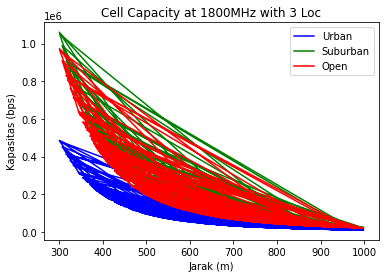

In [654]:
plt.figure()
plt.plot(d,CapUrban,'b', label='Urban')
plt.plot(d,CapSuburban,'g', label='Suburban')
plt.plot(d,CapOpen,'r', label='Open')
plt.legend()
plt.title('Cell Capacity at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [655]:
d_sort=d[np.argsort(d)]
CapUrban_sort    = CapUrban[np.argsort(d)]
CapSuburban_sort = CapSuburban[np.argsort(d)]
CapOpen_sort     = CapOpen[np.argsort(d)]

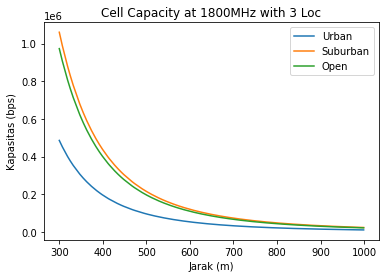

In [656]:
plt.figure()
plt.plot(d_sort,CapUrban_sort,label='Urban')
plt.plot(d_sort,CapSuburban_sort,label='Suburban')
plt.plot(d_sort,CapOpen_sort,label='Open')
plt.legend()
plt.title('Cell Capacity at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

# Cell Capacity Function 2ndGraph

In [657]:
#At Different Frequency (700 MHz, 900 MHz, 1800 MHz)

CapUrbanF1 = Bw*np.log2(1+SNRUrbanF1)
CapUrbanF2 = Bw*np.log2(1+SNRUrbanF2)
CapUrbanF3 = Bw*np.log2(1+SNRUrbanF3)

In [658]:
print(CapUrbanF1, "bps")

[ 263330.2997012   210440.86904352  184033.7375971   247971.66173341
 1169061.34684402 1469068.80229628  753384.48495122 2370179.61513815
 5643855.65884353 4260698.5322152   285088.2164973   401134.39146156
  186413.32974437 3229260.81255427  350648.81846883  976620.41262585
  529174.47168691 1709786.04465583  278930.25512355 1547337.79917806
 5643855.65884353  455628.39000649  296842.49707311 3039267.08834656
  193796.28160409 2959080.11412649 2715268.94902139  624360.66938058
 4707797.43978227  274920.40458487 3318167.56689176 3122034.94512633
  548087.45567262  186413.32974437 1304743.30143027 1150263.31038344
 1061769.83055451 1061769.83055451  382305.28577158  354761.01489471
  225115.30492482  986780.60332888 1067396.88089604  197630.40175635
  471218.41341894 1565427.85306613 3504729.30083028  449953.47756619
  675446.67329894  261460.5526162  1630840.3683371   380788.13433317
  409332.53142542  233754.63972818  550512.18047223  483363.60902153
  257772.37164698 5284854.31737724

In [659]:
print(CapUrbanF2, "bps")

[ 137959.8532809   110058.46581552   96163.77998331  129847.57114216
  630725.01754571  800141.6273297   401073.60655772 1327316.02409934
 3463588.50336384 2520144.84255373  149466.12052834  211111.06475922
   97414.86599043 1855050.57862629  184235.46862502  523669.90182456
  279666.45141438  938288.85555696  146207.93875492  844844.50092406
 3463588.50336384  240219.20888994  155688.95477108 1736255.16141486
  101297.74647057 1686470.04623273 1536389.64547818  330997.32295307
 2818795.17045202  144087.02809767 1911042.2364073  1787862.40895329
  289840.77277821   97414.86599043  706965.78769945  620211.82500595
  570882.31007316  570882.31007316  201077.25346074  186421.27302514
  117790.1562577   529290.32804626  574011.0593074   103314.95015062
  248565.51249523  855206.11148726 2029363.23066706  237183.1581278
  358675.01262364  136971.835537    892765.6530133   200269.31372614
  215483.58089203  122345.54294789  291146.05529841  255073.39433163
  135023.26920597 3213223.07681602 

In [660]:
print(CapUrbanF3, "bps")

[ 14591.73391361  11620.49907469  10144.67227827  13726.79330843
  68790.19717223  88196.70183975  43120.98833562 151222.60413094
 451770.52392838 309582.95912363  15820.03626482  22430.55666763
  10277.45255832 218491.44863581  19542.33951199  56733.80563498
  29841.56684974 104322.42402407  15472.04536547  93384.97547143
 451770.52392838  25569.54815667  16485.05783406 202972.57713064
  10689.68159763 196534.70755704 177360.03488608  35431.81790928
 352894.41634973  15245.59641386 225883.27842531 209687.01574488
  30946.79854922  10277.45255832  77473.57462941  67599.17523566
  62031.23192461  62031.23192461  21351.13783589  19776.88086877
  12442.82296818  57362.82751882  62383.37902252  10903.91789771
  26471.69113603  94591.61944487 241668.24968029  25241.61555923
  38460.82853533  14486.34387636  98978.4090269   21264.27945419
  22901.36317955  12927.69174023  31088.6913617   27175.76731025
  14278.53167766 412487.51033477  50373.8890466   35431.81790928
 265791.29707792  11311.4

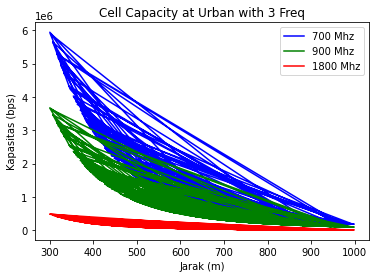

In [661]:
plt.figure()
plt.plot(d,CapUrbanF1,'b', label='700 Mhz')
plt.plot(d,CapUrbanF2,'g', label='900 Mhz')
plt.plot(d,CapUrbanF3,'r', label='1800 Mhz')
plt.legend()
plt.title('Cell Capacity at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [662]:
d_sort=d[np.argsort(d)]
CapUrbanF1_sort = CapUrbanF1[np.argsort(d)]
CapUrbanF2_sort = CapUrbanF2[np.argsort(d)]
CapUrbanF3_sort = CapUrbanF3[np.argsort(d)]

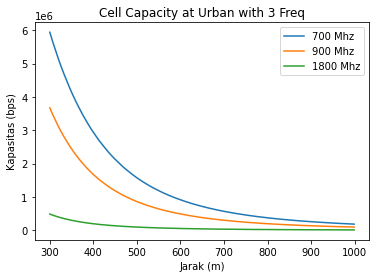

In [663]:
plt.figure()
plt.plot(d_sort,CapUrbanF1_sort,label='700 Mhz')
plt.plot(d_sort,CapUrbanF2_sort,label='900 Mhz')
plt.plot(d_sort,CapUrbanF3_sort,label='1800 Mhz')
plt.legend()
plt.title('Cell Capacity at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()